In [1]:
import pandas as pd
import numpy as np
import itertools
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np  
import re  
import nltk  
from sklearn.datasets import load_files   

from nltk.corpus import stopwords  
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 

In [2]:
df = pd.read_excel('News_dataset_training.xls')
df.head()

,category,News_description
0,Rejected,Illinois committed to giving Isaiah Williams a...
1,Shortlisted,Rome Milan is a challenge for the Champions Le...
2,Rejected,Francisco gives with the key and thinks about ...
3,Shortlisted,Real Madrid turns to banks to raise funds for ...
4,Rejected,How to guarantee a spot at your favorite state...


In [3]:
x=len(df['category'])
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
words = stopwords.words("english")

In [4]:
#from textblob import TextBlob
#df['News_description']=df.News_description.apply(lambda txt: ''.join(TextBlob(txt).correct()))

#from autocorrect import spell
#df['News_description']=df.News_description.apply(lambda txt: ''.join(spell(txt).correct()))

In [5]:
#to lower case
df['News_description'] = df['News_description'].apply(lambda x: " ".join([stemmer.stem(i)
for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())


#single letter on middle
df['News_description'] = df['News_description'].apply(lambda x: " ".join([stemmer.stem(i)
for i in re.sub("\s+[a-zA-Z]\s+", " ", x).split()]))

#single letter on start
df['News_description'] = df['News_description'].apply(lambda x: " ".join([stemmer.stem(i)
for i in re.sub("\^[a-zA-Z]\s+", " ", x).split() ]))

#multiple spaces
df['News_description'] = df['News_description'].apply(lambda x: " ".join([stemmer.stem(i)
for i in re.sub("\s+", " ", x).split() ]))

#puntuations,special char are not removed 

df.head()

,category,News_description
0,Rejected,illinoi commit give isaiah william shot quarte...
1,Shortlisted,rome milan challeng champion leagu exclu race ...
2,Rejected,francisco give key think miracl the sociedad d...
3,Shortlisted,real madrid turn bank rai fund revamp bernabeu...
4,Rejected,how guarant spot favorit state park texa state...


In [6]:
import unicodedata

def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text
df['News_description']=df['News_description'].apply(remove_accented_chars)

In [7]:
#eng vocab
df.head()

,category,News_description
0,Rejected,illinoi commit give isaiah william shot quarte...
1,Shortlisted,rome milan challeng champion leagu exclu race ...
2,Rejected,francisco give key think miracl the sociedad d...
3,Shortlisted,real madrid turn bank rai fund revamp bernabeu...
4,Rejected,how guarant spot favorit state park texa state...


In [8]:
#import for test train split and vect
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

def tfidf(data):
    tfidf_vectorizer =TfidfVectorizer(min_df=3,  max_features=None, 
             analyzer='word', use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')


    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer


In [9]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['category1']=LE.fit_transform(df['category'])
#init x and y variables as list
X = df["News_description"]
y = df.category1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)




#for traning:
X_train_vec, tfidf_vectorize = tfidf(X_train)


#for testing :
X_test_vec = tfidf_vectorize.transform(X_test)

In [19]:
from sklearn.decomposition import  TruncatedSVD 
import matplotlib.pyplot as plot
import matplotlib.patches as mpatches


def plot_LSA(test_data, test_labels):
        #reduce into 2 dimensions using svd 
        lsa = TruncatedSVD(n_components=2)
        #fits to the train data
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            red_patch = mpatches.Patch(color='orange', label='rejected')
            green_patch = mpatches.Patch(color='blue', label='shortlisted')
            plt.legend(handles=[red_patch, green_patch], prop={'size': 12})        

 

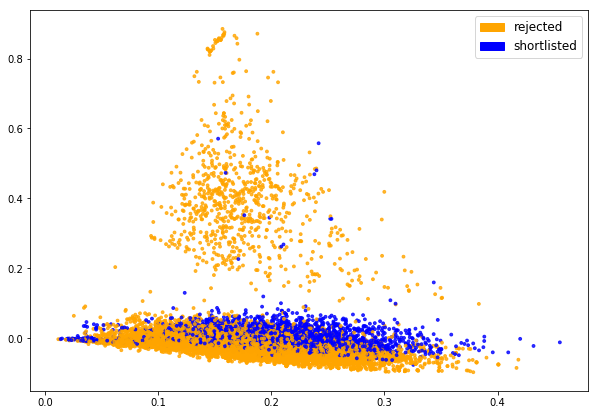

In [20]:
fig = plt.figure(figsize=(10,7)) 
plot_LSA(X_train_vec, y_train)
plt.show()

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, train_test_split,GridSearchCV
from sklearn.metrics import classification_report,accuracy_score, f1_score, precision_score, recall_score


def model(X_train_vec, X_test_vec, y_train, y_test):
    if __name__ == '__main__':
        
        clf_base = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)
        grid = { }     
        
        clf = GridSearchCV(clf_base, grid, cv=3, n_jobs=-1, scoring='f1_macro')

        clf.fit(X_train_vec, y_train)
        
        predicted= clf.predict(X_test_vec)
       
        
        
        def get_metrics(y_test, y_predicted):  
            # true positives / (true positives+false positives)
            precision = precision_score(y_test, y_predicted, pos_label=None,
                                            average='weighted')             
            # true positives / (true positives + false negatives)
            recall = recall_score(y_test, y_predicted, pos_label=None,
                                      average='weighted')

            # harmonic mean of precision and recall
            f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')

            # true positives + true negatives/ total
            accuracy = accuracy_score(y_test, y_predicted)
            return accuracy, precision, recall, f1

        accuracy, precision, recall, f1 = get_metrics(y_test, predicted)
        print( )
        print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))
        print( )
        print( )
        print (classification_report(y_test,predicted))

In [31]:
model(X_train_vec, X_test_vec, y_train, y_test)



accuracy = 0.950, precision = 0.950, recall = 0.950, f1 = 0.950


              precision    recall  f1-score   support

           0       0.96      0.97      0.97      4964
           1       0.91      0.90      0.91      1780

   micro avg       0.95      0.95      0.95      6744
   macro avg       0.94      0.93      0.94      6744
weighted avg       0.95      0.95      0.95      6744



Random under-sampling


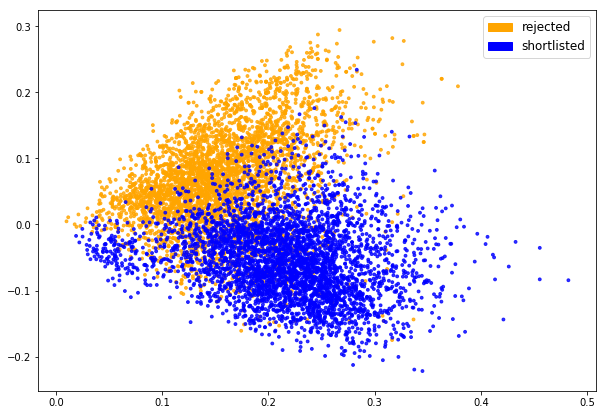

In [32]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
fig = plt.figure(figsize=(10,7)) 


rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X_train_vec, y_train)

print('Random under-sampling')


plot_LSA(X_rus, y_rus)
plt.show()



In [33]:
model(X_rus, X_test_vec, y_rus, y_test)


accuracy = 0.942, precision = 0.945, recall = 0.942, f1 = 0.943


              precision    recall  f1-score   support

           0       0.97      0.95      0.96      4964
           1       0.86      0.93      0.89      1780

   micro avg       0.94      0.94      0.94      6744
   macro avg       0.92      0.94      0.93      6744
weighted avg       0.94      0.94      0.94      6744



Random over-sampling


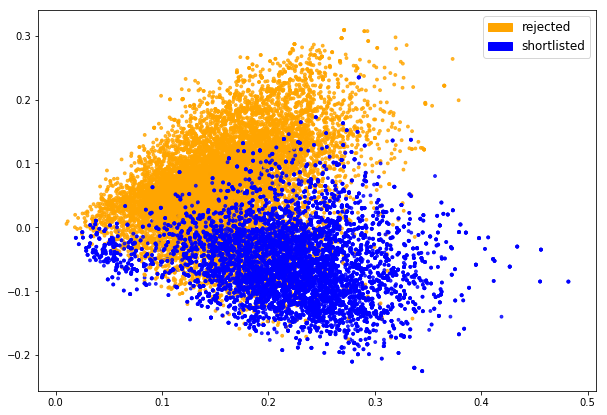

In [34]:
from imblearn.over_sampling import RandomOverSampler
fig = plt.figure(figsize=(10,7)) 
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X_train_vec, y_train)


print('Random over-sampling')


plot_LSA(X_ros, y_ros)
plt.show()


In [35]:
model(X_ros, X_test_vec, y_ros, y_test)


accuracy = 0.948, precision = 0.948, recall = 0.948, f1 = 0.948


              precision    recall  f1-score   support

           0       0.96      0.97      0.96      4964
           1       0.91      0.89      0.90      1780

   micro avg       0.95      0.95      0.95      6744
   macro avg       0.94      0.93      0.93      6744
weighted avg       0.95      0.95      0.95      6744



TomekLinks


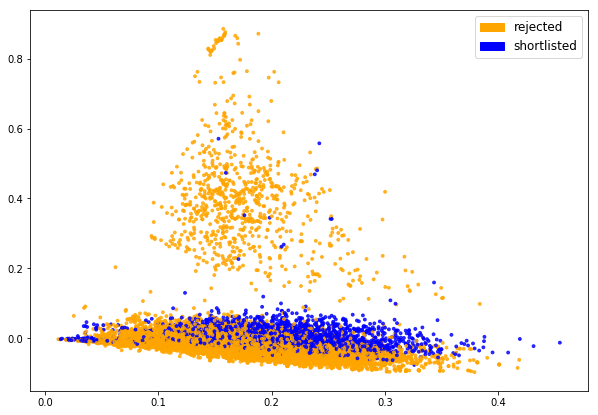

In [36]:
from imblearn.under_sampling import TomekLinks
fig = plt.figure(figsize=(10,7)) 

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X_train_vec, y_train)
print('TomekLinks')


plot_LSA(X_tl, y_tl)
plt.show()


In [37]:
model(X_tl, X_test_vec, y_tl, y_test)


accuracy = 0.950, precision = 0.950, recall = 0.950, f1 = 0.950


              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4964
           1       0.91      0.90      0.91      1780

   micro avg       0.95      0.95      0.95      6744
   macro avg       0.94      0.94      0.94      6744
weighted avg       0.95      0.95      0.95      6744



over_sample_somte


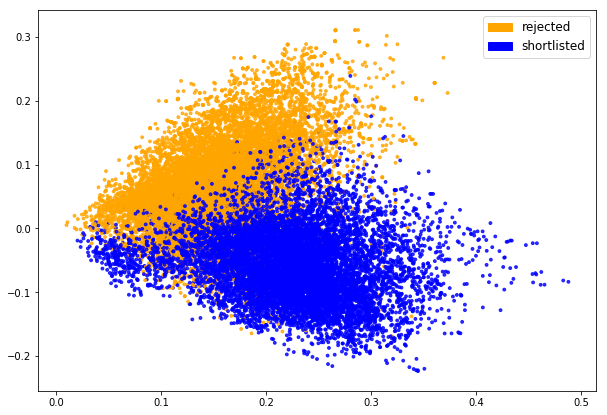

In [38]:
from imblearn.over_sampling import SMOTE
fig = plt.figure(figsize=(10,7)) 
smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X_train_vec, y_train)

print('over_sample_somte')


plot_LSA(X_sm, y_sm)
plt.show()



In [39]:
model(X_sm, X_test_vec, y_sm, y_test)


accuracy = 0.950, precision = 0.950, recall = 0.950, f1 = 0.950


              precision    recall  f1-score   support

           0       0.96      0.97      0.97      4964
           1       0.92      0.89      0.90      1780

   micro avg       0.95      0.95      0.95      6744
   macro avg       0.94      0.93      0.93      6744
weighted avg       0.95      0.95      0.95      6744



SMOTE + Tomek links


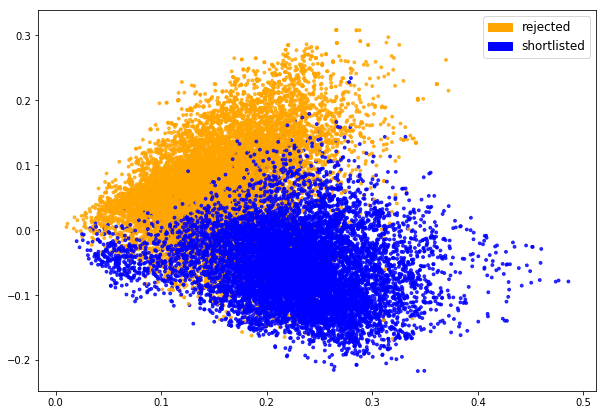

In [40]:
from imblearn.combine import SMOTETomek
fig = plt.figure(figsize=(10,7))

smtt = SMOTETomek()

X_smt, y_smt = smtt.fit_sample(X_train_vec, y_train)

print('SMOTE + Tomek links')


plot_LSA(X_smt, y_smt)
plt.show()


In [41]:
model(X_smt, X_test_vec, y_smt, y_test)


accuracy = 0.950, precision = 0.950, recall = 0.950, f1 = 0.950


              precision    recall  f1-score   support

           0       0.96      0.97      0.97      4964
           1       0.92      0.89      0.90      1780

   micro avg       0.95      0.95      0.95      6744
   macro avg       0.94      0.93      0.94      6744
weighted avg       0.95      0.95      0.95      6744



SMOTE + ENN


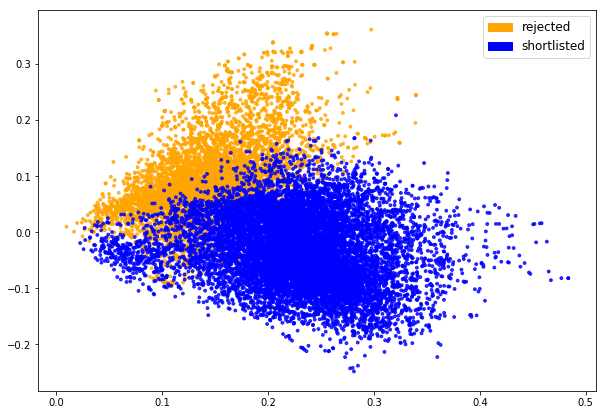

In [43]:
from imblearn.combine import SMOTEENN
fig = plt.figure(figsize=(10,7))
een = SMOTEENN()
X_een, y_een = een.fit_sample(X_train_vec, y_train)

print('SMOTE + ENN')


plot_LSA(X_een, y_een)
plt.show()

In [44]:
model(X_een, X_test_vec, y_een, y_test)


accuracy = 0.895, precision = 0.917, recall = 0.895, f1 = 0.899


              precision    recall  f1-score   support

           0       0.99      0.87      0.92      4964
           1       0.73      0.97      0.83      1780

   micro avg       0.89      0.89      0.89      6744
   macro avg       0.86      0.92      0.88      6744
weighted avg       0.92      0.89      0.90      6744



over_sample_somte


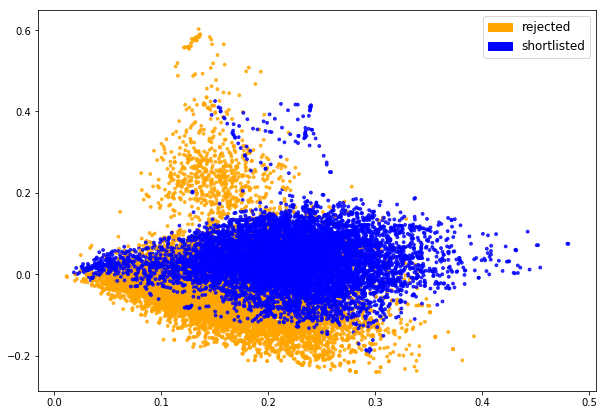

In [71]:
 from imblearn.over_sampling import ADASYN
fig = plt.figure(figsize=(10,7)) 
ada = ADASYN(ratio='all')
X_asm, y_asm = ada.fit_sample(X_train_vec, y_train)

print('adasyn')


plot_LSA(X_asm, y_asm)
plt.show()


In [72]:
model(X_asm, X_test_vec, y_asm, y_test)


accuracy = 0.949, precision = 0.949, recall = 0.949, f1 = 0.949


              precision    recall  f1-score   support

           0       0.96      0.97      0.97      4964
           1       0.92      0.88      0.90      1780

   micro avg       0.95      0.95      0.95      6744
   macro avg       0.94      0.93      0.93      6744
weighted avg       0.95      0.95      0.95      6744



over_sample_somte


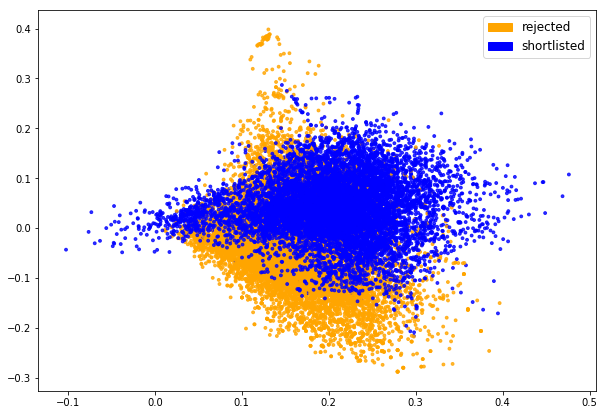

In [76]:
from imblearn.over_sampling import SVMSMOTE

fig = plt.figure(figsize=(10,7)) 
stec = SVMSMOTE(random_state=42)
X_svm, y_svm = stec.fit_sample(X_train_vec, y_train)

print('svm_somte')


plot_LSA(X_svm, y_svm)
plt.show()

In [77]:
model(X_svm, X_test_vec, y_svm, y_test)


accuracy = 0.949, precision = 0.949, recall = 0.949, f1 = 0.949


              precision    recall  f1-score   support

           0       0.96      0.97      0.97      4964
           1       0.91      0.90      0.90      1780

   micro avg       0.95      0.95      0.95      6744
   macro avg       0.94      0.93      0.93      6744
weighted avg       0.95      0.95      0.95      6744



over_sample_somte


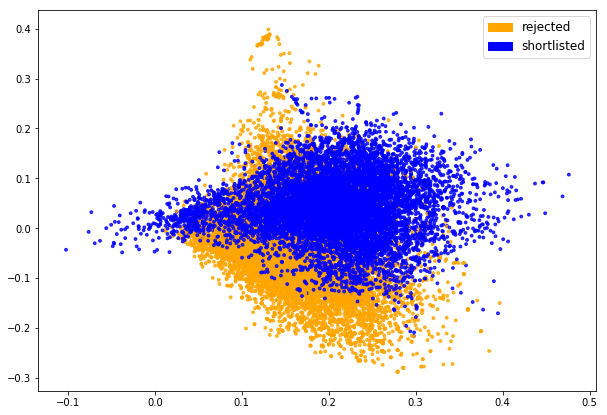

In [78]:
from imblearn.over_sampling import BorderlineSMOTE 
fig = plt.figure(figsize=(10,7)) 

bds = SVMSMOTE(random_state=42)
X_bds, y_bds = bds.fit_sample(X_train_vec, y_train)

print('over_sample_somte')


plot_LSA(X_bds, y_bds)
plt.show()


In [80]:
model(X_bds, X_test_vec, y_bds, y_test)


accuracy = 0.949, precision = 0.949, recall = 0.949, f1 = 0.949


              precision    recall  f1-score   support

           0       0.96      0.97      0.97      4964
           1       0.91      0.90      0.90      1780

   micro avg       0.95      0.95      0.95      6744
   macro avg       0.94      0.93      0.93      6744
weighted avg       0.95      0.95      0.95      6744



In [82]:
# Here is a data frame containing the results of all the methods I used. Balance Cascade came
# out on top.

import pandas as pd



df = pd.DataFrame({'algorithm' : ['random_us', 'random os', 't_links', 'smote',
                                  'smote+tlink', 'smote+enn','ADA','svmsmote','BL_smote'],
                   'precision' : [95,94,95,95,95,91,94,94,94],
                   'recall' :    [95,94,95,95,95,89,94,94,94]})

df['overall'] = df.apply(lambda row: (row.precision + row.recall)/2, axis=1)

df = df.sort_values(['overall'], ascending=False)

df

,algorithm,precision,recall,overall
0,random_us,95,95,95.0
2,t_links,95,95,95.0
3,smote,95,95,95.0
4,smote+tlink,95,95,95.0
1,random os,94,94,94.0
6,ADA,94,94,94.0
7,svmsmote,94,94,94.0
8,BL_smote,94,94,94.0
5,smote+enn,91,89,90.0
